In [1]:
from sklearn.cluster import MiniBatchKMeans, KMeans 
from sklearn.metrics.pairwise import pairwise_distances_argmin 
from sklearn.datasets.samples_generator import make_blobs 
  
# Load data in X  
batch_size = 45
centers = [[1, 1], [-2, -1], [1, -2], [1, 9]] 
n_clusters = len(centers) 
X, labels_true = make_blobs(n_samples = 3000, 
                            centers = centers, 
                            cluster_std = 0.9) 
  
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 4, 
                      batch_size = batch_size, n_init = 10, 
                      max_no_improvement = 10, verbose = 0) 
  
mbk.fit(X) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers) 
  
# print the labels of each data 
print(mbk_means_labels) 

<IPython.core.display.Javascript object>

[3 0 3 ... 3 1 1]


The mini batch K-means is faster but gives slightly different results than the normal batch K-means.
Here we cluster a set of data, first with K-means and then with mini batch K-means, and plot the results. We will also plot the points that are labeled differently between the two algorithms.


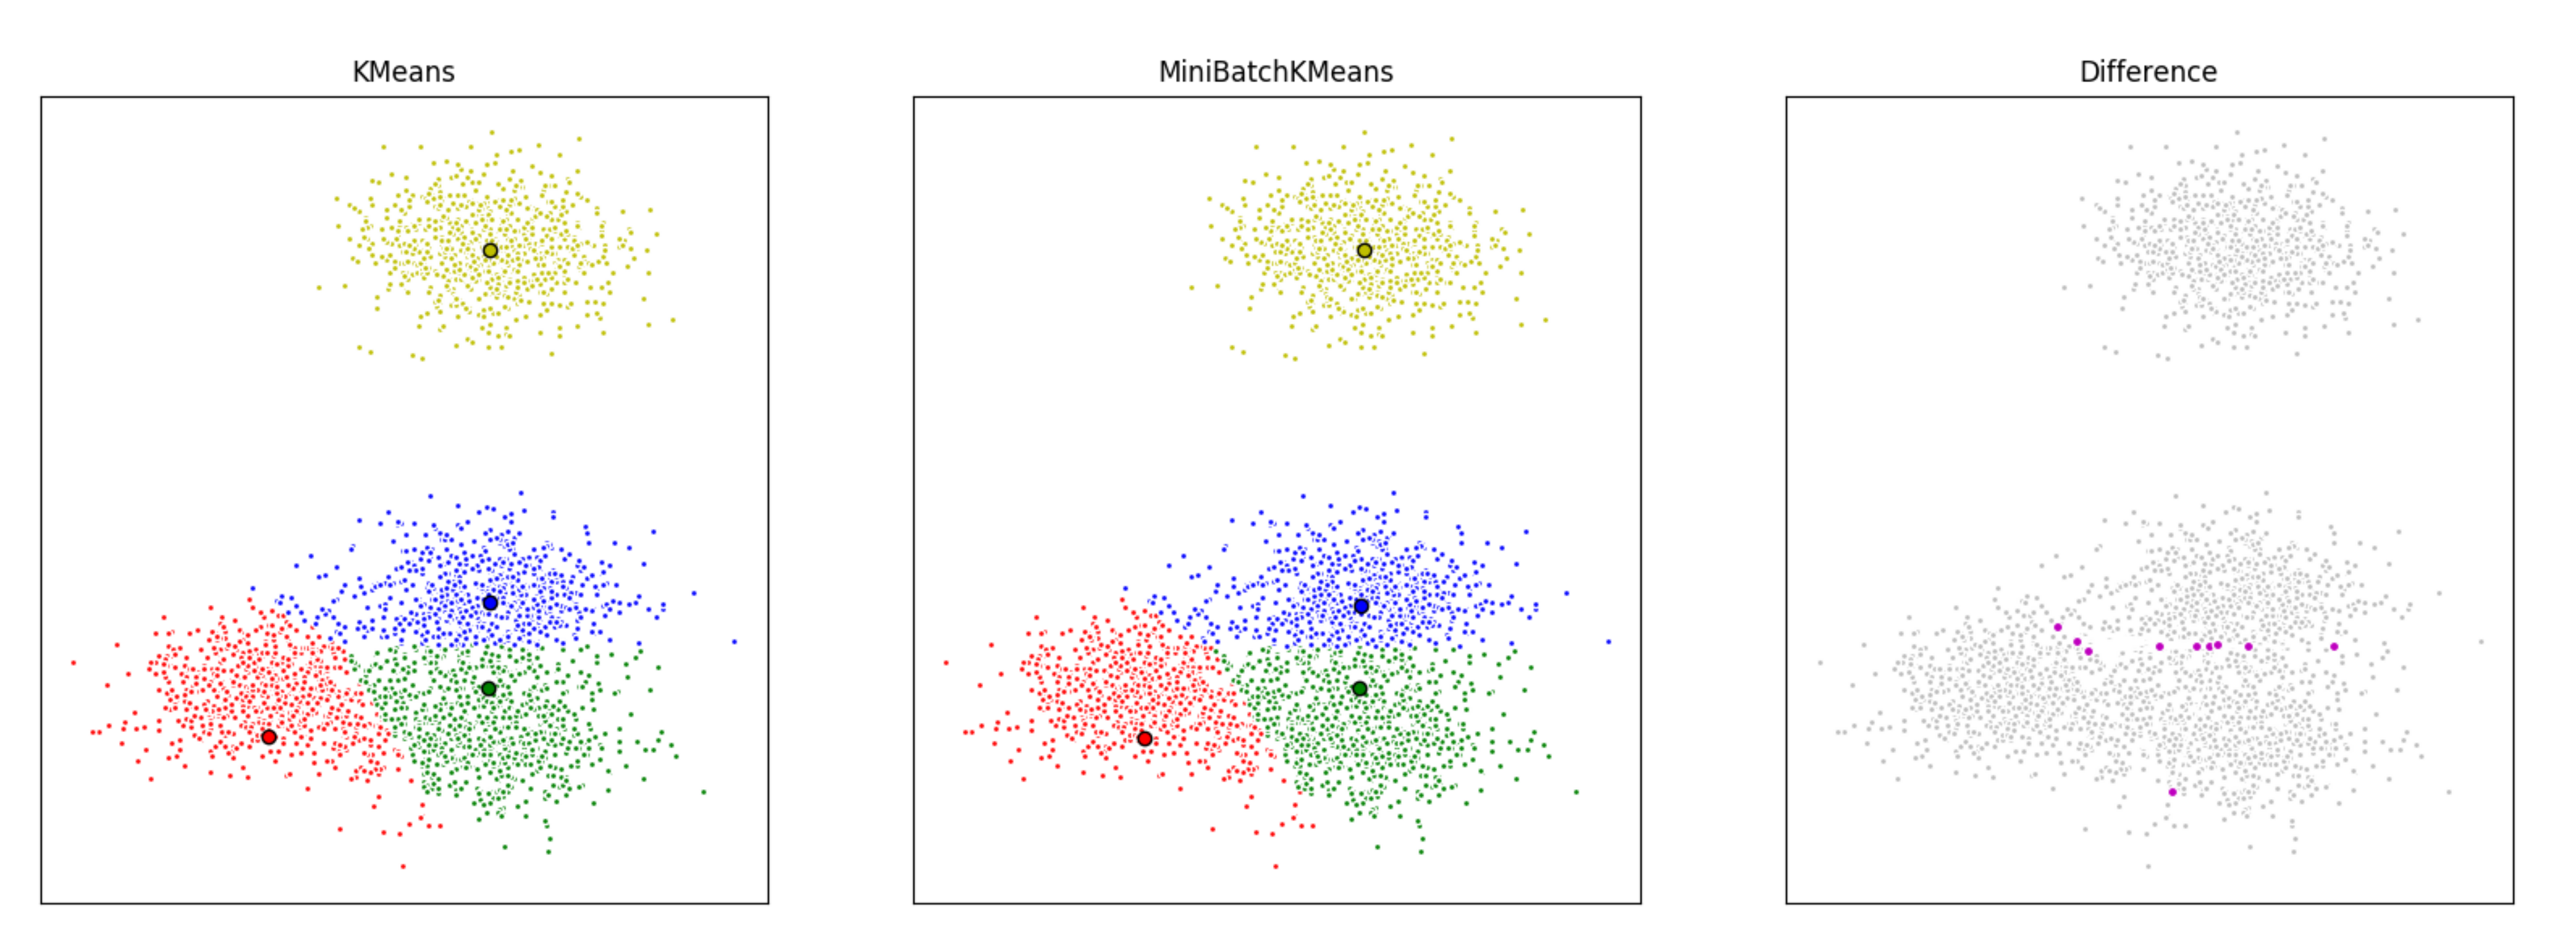


As the number clusters and the number of data increases, the relative saving in computational time also increases. The saving in computational time is more noticeable only when the number of clusters is very large. The effect of the batch size in the computational time is also more evident when the number of clusters is larger. It can be concluded that, increasing the number of clusters, decreases the similarity of the mini batch K-means solution to the K-means solution. Despite that the agreement between the partitions decreases as the number of clusters increases, the objective function does not degrade at the same rate. It means that the final partitions are different, but closer in quality.


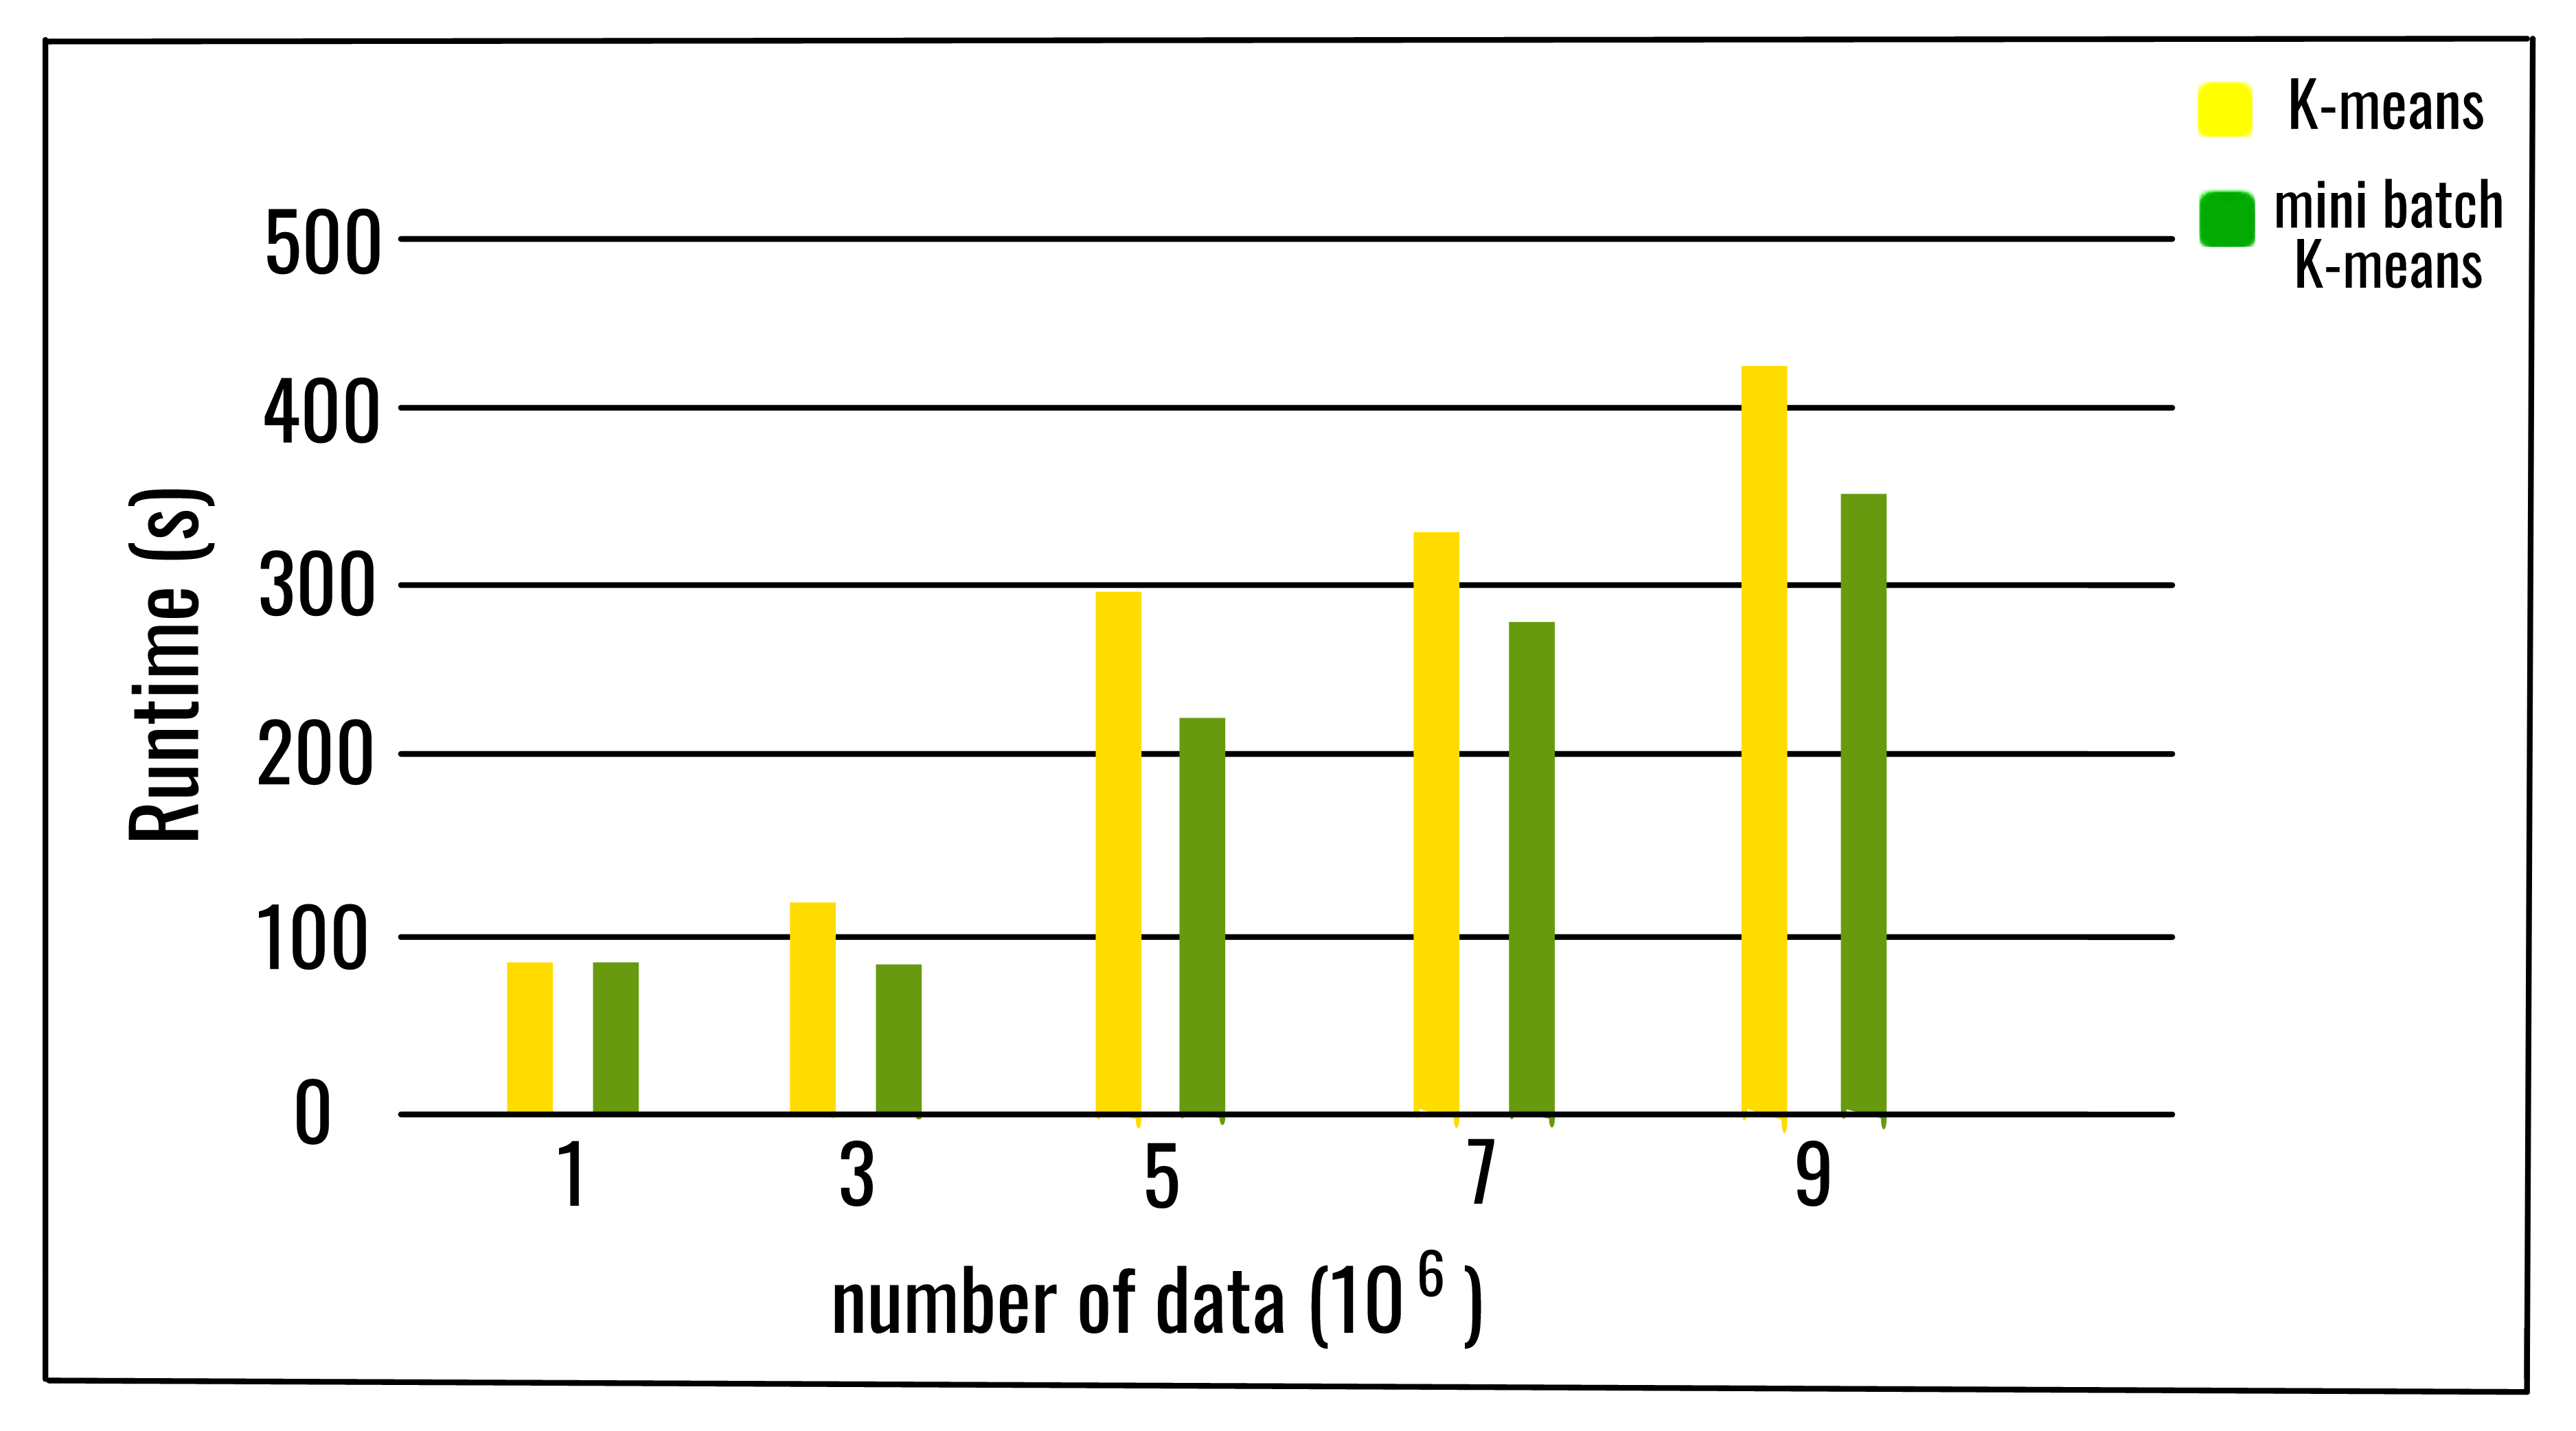

- mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.
- MiniBatchKMeans converges faster than KMeans, but the quality of the results is reduced. 
- 